In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
link = "./data/irrigation.csv"
irrigation = pd.read_csv(link)

link = "./data/npk.csv"
npk = pd.read_csv(link)

link = "./data/soil.csv"
soil = pd.read_csv(link)

link = "./data/rainfall.csv"
rainfall = pd.read_csv(link)

link = "./data/yield.csv"
crop_yield = pd.read_csv(link)

link = "./data/temp.csv"
temp = pd.read_csv(link)

In [3]:
def process_dataset(dataset, start_year, end_year):
    """
    Filters the dataset based on a year range and standardizes column names.

    Parameters:
        dataset (pd.DataFrame): Input dataset to process.
        start_year (int): Start year for filtering.
        end_year (int): End year for filtering.

    Returns:
        pd.DataFrame: Processed dataset with filtered rows and updated column names.
    """
    # Ensure the dataset has a 'year' column
    if 'Year' not in dataset.columns:
        raise ValueError("The dataset must contain a 'Year' column.")

    # Filter rows where 'Year' is within the specified range
    filtered_dataset = dataset[(dataset['Year'] >= start_year) & (dataset['Year'] <= end_year)]

    # Update column names: lowercase and replace spaces with underscores
    filtered_dataset.columns = filtered_dataset.columns.str.lower().str.replace(' ', '_')

    return filtered_dataset

In [4]:
datasets = [irrigation, npk, rainfall, crop_yield, temp]
processed_datasets = [process_dataset(df, 1990, 2017) for df in datasets]

v, w, x, y, z = processed_datasets
a1 = pd.merge(v,w,on=['dist_code', 'state_code', 'year'],how='inner')
b1 = pd.merge(a1,x,on=['dist_code', 'state_code', 'year'],how='inner')
c1 = pd.merge(b1.drop(columns=['state_name_x', 'dist_name_x']), y, on=['dist_code', 'state_code', 'year'],how='inner')
d1 = pd.merge(c1, z, on=['dist_code', 'state_code', 'year'],how='inner')
df = d1.loc[:, ~d1.T.duplicated()].drop(columns=['dist_name_x'])

df.replace(-1.0, np.nan, inplace=True)

In [5]:
fav_cols = [
    # Identifiers
    'dist_code',
    'year',
    'state_code',
    'state_name_y',
    'dist_name_y',

    # # Irrigated Area Columns (in 1000 ha)
    # 'rice_irrigated_area_(1000_ha)',
    # 'wheat_irrigated_area_(1000_ha)',
    # 'kharif_sorghum_irrigated_area_(1000_ha)',
    # 'rabi_sorghum_irrigated_area_(1000_ha)',
    # 'sorghum_irrigated_area_(1000_ha)',
    # 'pearl_millet_irrigated_area_(1000_ha)',
    # 'maize_irrigated_area_(1000_ha)',
    # 'finger_millet_irrigated_area_(1000_ha)',
    # 'barley_irrigated_area_(1000_ha)',
    # 'chickpea_irrigated_area_(1000_ha)',
    # 'pigeonpea_irrigated_area_(1000_ha)',
    # 'minor_pulses_irrigated_area_(1000_ha)',
    # 'pulses_irrigated_area_(1000_ha)',
    # 'groundnut_irrigated_area_(1000_ha)',
    # 'sesamum_irrigated_area_(1000_ha)',
    # 'linseed_irrigated_area_(1000_ha)',
    # 'sugarcane_irrigated_area_(1000_ha)',
    # 'cotton_irrigated_area_(1000_ha)',


    # Nutrient Consumption and Share
    'nitrogen_share_in_npk_(percent)',
    'phosphate_share_in_npk_(percent)',
    'potash_share_in_npk_(percent)',

    # Rainfall (millimeters)
    'january_rainfall_(millimeters)',
    'february_rainfall_(millimeters)',
    'march_rainfall_(millimeters)',
    'april_rainfall_(millimeters)',
    'may_rainfall_(millimeters)',
    'june_rainfall_(millimeters)',
    'july_rainfall_(millimeters)',
    'august_rainfall_(millimeters)',
    'september_rainfall_(millimeters)',
    'october_rainfall_(millimeters)',
    'november_rainfall_(millimeters)',
    'december_rainfall_(millimeters)',
    'annual_rainfall_(millimeters)',

    # Yield (kg per ha)
    'rice_yield_(kg_per_ha)',
    'wheat_yield_(kg_per_ha)',
    'kharif_sorghum_yield_(kg_per_ha)',
    'rabi_sorghum_yield_(kg_per_ha)',
    'sorghum_yield_(kg_per_ha)',
    'pearl_millet_yield_(kg_per_ha)',
    'maize_yield_(kg_per_ha)',
    'finger_millet_yield_(kg_per_ha)',
    'barley_yield_(kg_per_ha)',
    'chickpea_yield_(kg_per_ha)',
    'pigeonpea_yield_(kg_per_ha)',
    'minor_pulses_yield_(kg_per_ha)',
    'groundnut_yield_(kg_per_ha)',
    'sesamum_yield_(kg_per_ha)',
    'rapeseed_and_mustard_yield_(kg_per_ha)',
    'safflower_yield_(kg_per_ha)',
    'castor_yield_(kg_per_ha)',
    'linseed_yield_(kg_per_ha)',
    'sunflower_yield_(kg_per_ha)',
    'soyabean_yield_(kg_per_ha)',
    'oilseeds_yield_(kg_per_ha)',
    'sugarcane_yield_(kg_per_ha)',
    'cotton_yield_(kg_per_ha)',

    # Minimum Temperature
    'january_minimum_temperature_(centigrate)',
     'february_minimum_temperature_(centigrate)',
     'march_minimum_temperature_(centigrate)',
     'april_minimum_temperature_(centigrate)',
     'may_minimum_temperature_(centigrate)',
     'june_minimum_temperature_(centigrate)',
     'july_minimum_temperature_(centigrate)',
     'august_minimum_temperature_(centigrate)',
     'september_minimum_temperature_(centigrate)',
     'october_minimum_temperature_(centigrate)',
     'november_minimum_temperature_(centigrate)',
     'december_minimum_temperature_(centigrate)',

    # Maximum Temperature
                'january_maximum_temperature_(centigrate)',
 'february_maximum_temperature_(centigrate)',
 'march_maximum_temperature_(centigrate)',
 'april_maximum_temperature_(centigrate)',
 'may_maximum_temperature_(centigrate)',
 'june_maximum_temperature_(centigrate)',
 'july_maximum_temperature_(centigrate)',
 'august_maximum_temperature_(centigrate)',
 'september_maximum_temperature_(centigrate)',
 'october_maximum_temperature_(centigrate)',
 'november_maximum_temperature_(centigrate)',
 'december_maximum_temperature_(centigrate)',

]

In [6]:
for col in df.columns:
    if col not in fav_cols:
        df.drop(columns=col, inplace=True)

df = df.dropna()

In [7]:
# Seasonal Aggregates
df['rainfall_kharif'] = df[['june_rainfall_(millimeters)', 'july_rainfall_(millimeters)', 'august_rainfall_(millimeters)', 'september_rainfall_(millimeters)', 'october_rainfall_(millimeters)']].sum(axis=1)
df['rainfall_rabi'] = df[['november_rainfall_(millimeters)', 'december_rainfall_(millimeters)', 'january_rainfall_(millimeters)', 'february_rainfall_(millimeters)', 'march_rainfall_(millimeters)']].sum(axis=1)
df['rainfall_summer'] = df[['april_rainfall_(millimeters)', 'may_rainfall_(millimeters)']].sum(axis=1)

# Drop monthly rainfall if no longer needed
df = df.drop(columns=[f'{month}_rainfall_(millimeters)' for month in ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']])

# Average and range temperature columns for each season
df['temp_kharif_avg'] = df[['june_maximum_temperature_(centigrate)',
 'july_maximum_temperature_(centigrate)',
 'august_maximum_temperature_(centigrate)',
 'september_maximum_temperature_(centigrate)',
 'october_maximum_temperature_(centigrate)',]].mean(axis=1)

df['temp_rabi_avg'] = df[['november_maximum_temperature_(centigrate)',
 'december_maximum_temperature_(centigrate)',
 'january_maximum_temperature_(centigrate)',
 'february_maximum_temperature_(centigrate)',
 'march_maximum_temperature_(centigrate)',]].mean(axis=1)

df['temp_summer_avg'] = df[['april_maximum_temperature_(centigrate)',
 'may_maximum_temperature_(centigrate)',]].mean(axis=1)

# df['temp_kharif_range'] = df[['Temp_Max_Jun', 'Temp_Max_Jul', 'Temp_Max_Aug', 'Temp_Max_Sep', 'Temp_Max_Oct']].max(axis=1) - \
#                           df[['Temp_Min_Jun', 'Temp_Min_Jul', 'Temp_Min_Aug', 'Temp_Min_Sep', 'Temp_Min_Oct']].min(axis=1)

# df['temp_rabi_range'] = df[['Temp_Max_Nov', 'Temp_Max_Dec', 'Temp_Max_Jan', 'Temp_Max_Feb', 'Temp_Max_Mar']].max(axis=1) - \
#                          df[['Temp_Min_Nov', 'Temp_Min_Dec', 'Temp_Min_Jan', 'Temp_Min_Feb', 'Temp_Min_Mar']].min(axis=1)

# Drop monthly temperature columns if not needed
df = df.drop(columns=[f'{month}_maximum_temperature_(centigrate)' for month in ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']] +
                     [f'{month}_minimum_temperature_(centigrate)' for month in ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']])

In [8]:
# Identify crop yield columns
yield_columns = [col for col in df.columns if 'yield' in col.lower()]

# Debugging: Ensure yield columns are identified
if not yield_columns:
    raise ValueError("No yield columns found. Please verify the dataset column names.")
print("Yield columns identified:", yield_columns)

# Restructure the dataset
id_vars = ['dist_code', 'year', 'state_code', 'state_name_y', 'dist_name_y',
       'nitrogen_share_in_npk_(percent)', 'phosphate_share_in_npk_(percent)',
       'potash_share_in_npk_(percent)', 'annual_rainfall_(millimeters)',
       'rainfall_kharif', 'rainfall_rabi', 'rainfall_summer',
       'temp_kharif_avg', 'temp_rabi_avg', 'temp_summer_avg']  # Explicit metadata columns
try:
    df_long = pd.melt(
        df,
        id_vars=id_vars,  # Keep metadata columns
        value_vars=yield_columns,  # Reshape yield columns
        var_name="crop",
        value_name="yield"
    )
    print("Reshaping successful. New DataFrame shape:", df_long.shape)
except Exception as e:
    print("Error during pd.melt:", e)
    raise

# Clean the crop names
df_long['crop'] = df_long['crop'].str.removesuffix('_yield_(kg_per_ha)')

# Drop rows where yield is NaN
# df_long = df_long.dropna(subset=["Yield"])

# Add normalized yield to act as a proxy for suitability
# df_long['Normalized_Yield'] = df_long.groupby('Crop')['Yield'].transform(
#     lambda x: (x - x.min()) / (x.max() - x.min() + 1e-9)  # Normalize within crop
# )

print("Data normalization successful.")

Yield columns identified: ['wheat_yield_(kg_per_ha)', 'kharif_sorghum_yield_(kg_per_ha)', 'rabi_sorghum_yield_(kg_per_ha)', 'sorghum_yield_(kg_per_ha)', 'maize_yield_(kg_per_ha)', 'finger_millet_yield_(kg_per_ha)', 'barley_yield_(kg_per_ha)', 'pigeonpea_yield_(kg_per_ha)', 'minor_pulses_yield_(kg_per_ha)', 'sesamum_yield_(kg_per_ha)', 'rapeseed_and_mustard_yield_(kg_per_ha)', 'safflower_yield_(kg_per_ha)', 'castor_yield_(kg_per_ha)', 'linseed_yield_(kg_per_ha)', 'sunflower_yield_(kg_per_ha)', 'soyabean_yield_(kg_per_ha)', 'oilseeds_yield_(kg_per_ha)', 'cotton_yield_(kg_per_ha)']
Reshaping successful. New DataFrame shape: (118206, 17)
Data normalization successful.


In [9]:
df_long['temp_avg'] = (df_long['temp_kharif_avg'] + df_long['temp_rabi_avg'] + df_long['temp_summer_avg']) / 3
df_long.drop(columns=['temp_summer_avg', 'temp_rabi_avg', 'temp_kharif_avg'], inplace=True)
df_long.drop(columns=['rainfall_kharif','rainfall_rabi', 'rainfall_summer'], inplace=True)

df_long

,dist_code,year,state_code,state_name_y,dist_name_y,nitrogen_share_in_npk_(percent),phosphate_share_in_npk_(percent),potash_share_in_npk_(percent),annual_rainfall_(millimeters),crop,yield,temp_avg
0,1,1990,14,Chhattisgarh,Durg,60.3,29.9,9.8,1309.7,wheat,685.08,33.521667
1,1,1991,14,Chhattisgarh,Durg,48.1,38.3,13.7,764.9,wheat,620.69,34.084667
2,1,1994,14,Chhattisgarh,Durg,62.7,29.6,7.8,1462.9,wheat,805.48,33.940666
3,1,1995,14,Chhattisgarh,Durg,62.7,29.6,7.8,1350.6,wheat,714.29,33.904000
4,1,1996,14,Chhattisgarh,Durg,62.7,29.6,7.8,1289.7,wheat,803.87,34.560000
...,...,...,...,...,...,...,...,...,...,...,...,...
118201,916,2011,15,Jharkhand,Ranchi,63.9,27.7,8.4,1583.9,cotton,0.00,31.548666
118202,916,2012,15,Jharkhand,Ranchi,70.8,26.5,2.8,1241.6,cotton,0.00,31.874333
118203,916,2013,15,Jharkhand,Ranchi,78.1,18.0,3.9,1102.8,cotton,0.00,31.370001
118204,916,2014,15,Jharkhand,Ranchi,65.1,29.7,5.2,901.0,cotton,0.00,31.586000


In [155]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint
import xgboost as xgb
import lightgbm as lgb

# Load the dataset
df = df_long

# Encode categorical variables: state_name_y and dist_name_y
label_encoder = LabelEncoder()
df['state_encoded'] = label_encoder.fit_transform(df['state_name_y'])
df['dist_encoded'] = label_encoder.fit_transform(df['dist_name_y'])
df['crop_encoded'] = label_encoder.fit_transform(df_long['crop'])

# Features and target for crop classification
features = ['nitrogen_share_in_npk_(percent)',
            'phosphate_share_in_npk_(percent)', 'potash_share_in_npk_(percent)',
            'annual_rainfall_(millimeters)', 'temp_avg']
target = 'crop_encoded'

# Split data for classification
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare for storing results
results = {'Model': [], 'Best Score': [], 'Best Params': []}

In [157]:
# Train a Random Forest Classifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)

Top 5 Crops with Success Probabilities:
soyabean: 66.83%
minor_pulses: 62.78%
wheat: 61.83%
sorghum: 61.23%
oilseeds: 61.14%


In [182]:
# Predict top 5 crops for new input conditions
new_conditions = pd.DataFrame([{
    # 'dist_encoded': 5,
    # 'state_encoded': 9,
    'nitrogen_share_in_npk_(percent)': 55,
    'phosphate_share_in_npk_(percent)': 28,
    'potash_share_in_npk_(percent)': 12,
    'annual_rainfall_(millimeters)': 650,
    'temp_avg': 21
}])

# Align the columns of new_conditions with the order of X_train columns
new_conditions = new_conditions[X_train.columns]

# Get probabilities for all crops
probabilities = clf.predict_proba(new_conditions)

# Find top 5 crops with highest probabilities
sorted_indices = probabilities.argsort(axis=1)[:, ::-1]  # Descending order
top_5_indices = sorted_indices[0, :5]
top_5_crops = [(label_encoder.inverse_transform([i])[0], probabilities[0, i]*10) for i in top_5_indices]
print("Top 5 Crops with Success Probabilities:")
for crop, prob in top_5_crops:
    print(f"{crop}: {prob:.2%}")

Top 5 Crops with Success Probabilities:
pigeonpea: 67.11%
minor_pulses: 64.69%
cotton: 63.85%
finger_millet: 62.74%
rapeseed_and_mustard: 60.29%


In [184]:
# Predict yields for the top 5 crops
print("\nPredicted Yields for Top 5 Crops:")
for crop, prob in top_5_crops:
    if crop in regression_models:
        yield_pred = regression_models[crop].predict(new_conditions)[0]
        print(f"{crop}: {yield_pred:.2f} kg/ha (Success Probability: {prob:.2%})")


Predicted Yields for Top 5 Crops:
pigeonpea: 293.66 kg/ha (Success Probability: 67.11%)
minor_pulses: 435.29 kg/ha (Success Probability: 64.69%)
cotton: 27.36 kg/ha (Success Probability: 63.85%)
finger_millet: 928.45 kg/ha (Success Probability: 62.74%)
rapeseed_and_mustard: 478.73 kg/ha (Success Probability: 60.29%)


In [158]:
# Train separate regression models for each crop
regression_models = {}
df = df.drop(columns=['state_encoded', 'dist_encoded'])
for crop in df['crop'].unique():
    # Filter data for this crop
    crop_data = df[df['crop'] == crop]
    X_crop = crop_data[features]
    y_crop = crop_data['yield']
    
    # Train a regression model
    regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    regressor.fit(X_crop, y_crop)
    regression_models[crop] = regressor


Predicted Yields for Top 5 Crops:
soyabean: 1046.62 kg/ha (Success Probability: 6.68%)
minor_pulses: 569.16 kg/ha (Success Probability: 6.28%)
wheat: 1471.21 kg/ha (Success Probability: 6.18%)
sorghum: 946.96 kg/ha (Success Probability: 6.12%)
oilseeds: 858.36 kg/ha (Success Probability: 6.11%)


In [39]:
import pickle

# Save the model to a file
with open('rf_class.pkl', 'wb') as file:
    pickle.dump(clf, file)

with open('rf_regress.pkl', 'wb') as file:
    pickle.dump(regressor, file)

In [45]:
# Load the model from the file
with open('rf_regress.pkl', 'rb') as file:
    clf_loaded = pickle.load(file)

X_test = [[60,80,20,600,21]]
# Use the loaded model to make predictions
y_pred = clf_loaded.predict(X_test)

In [50]:
y_pred

array([24.1567])

In [133]:
plt.style.use('ggplot')
sns.set_style('darkgrid')

ValueError: Could not interpret input 'crop'

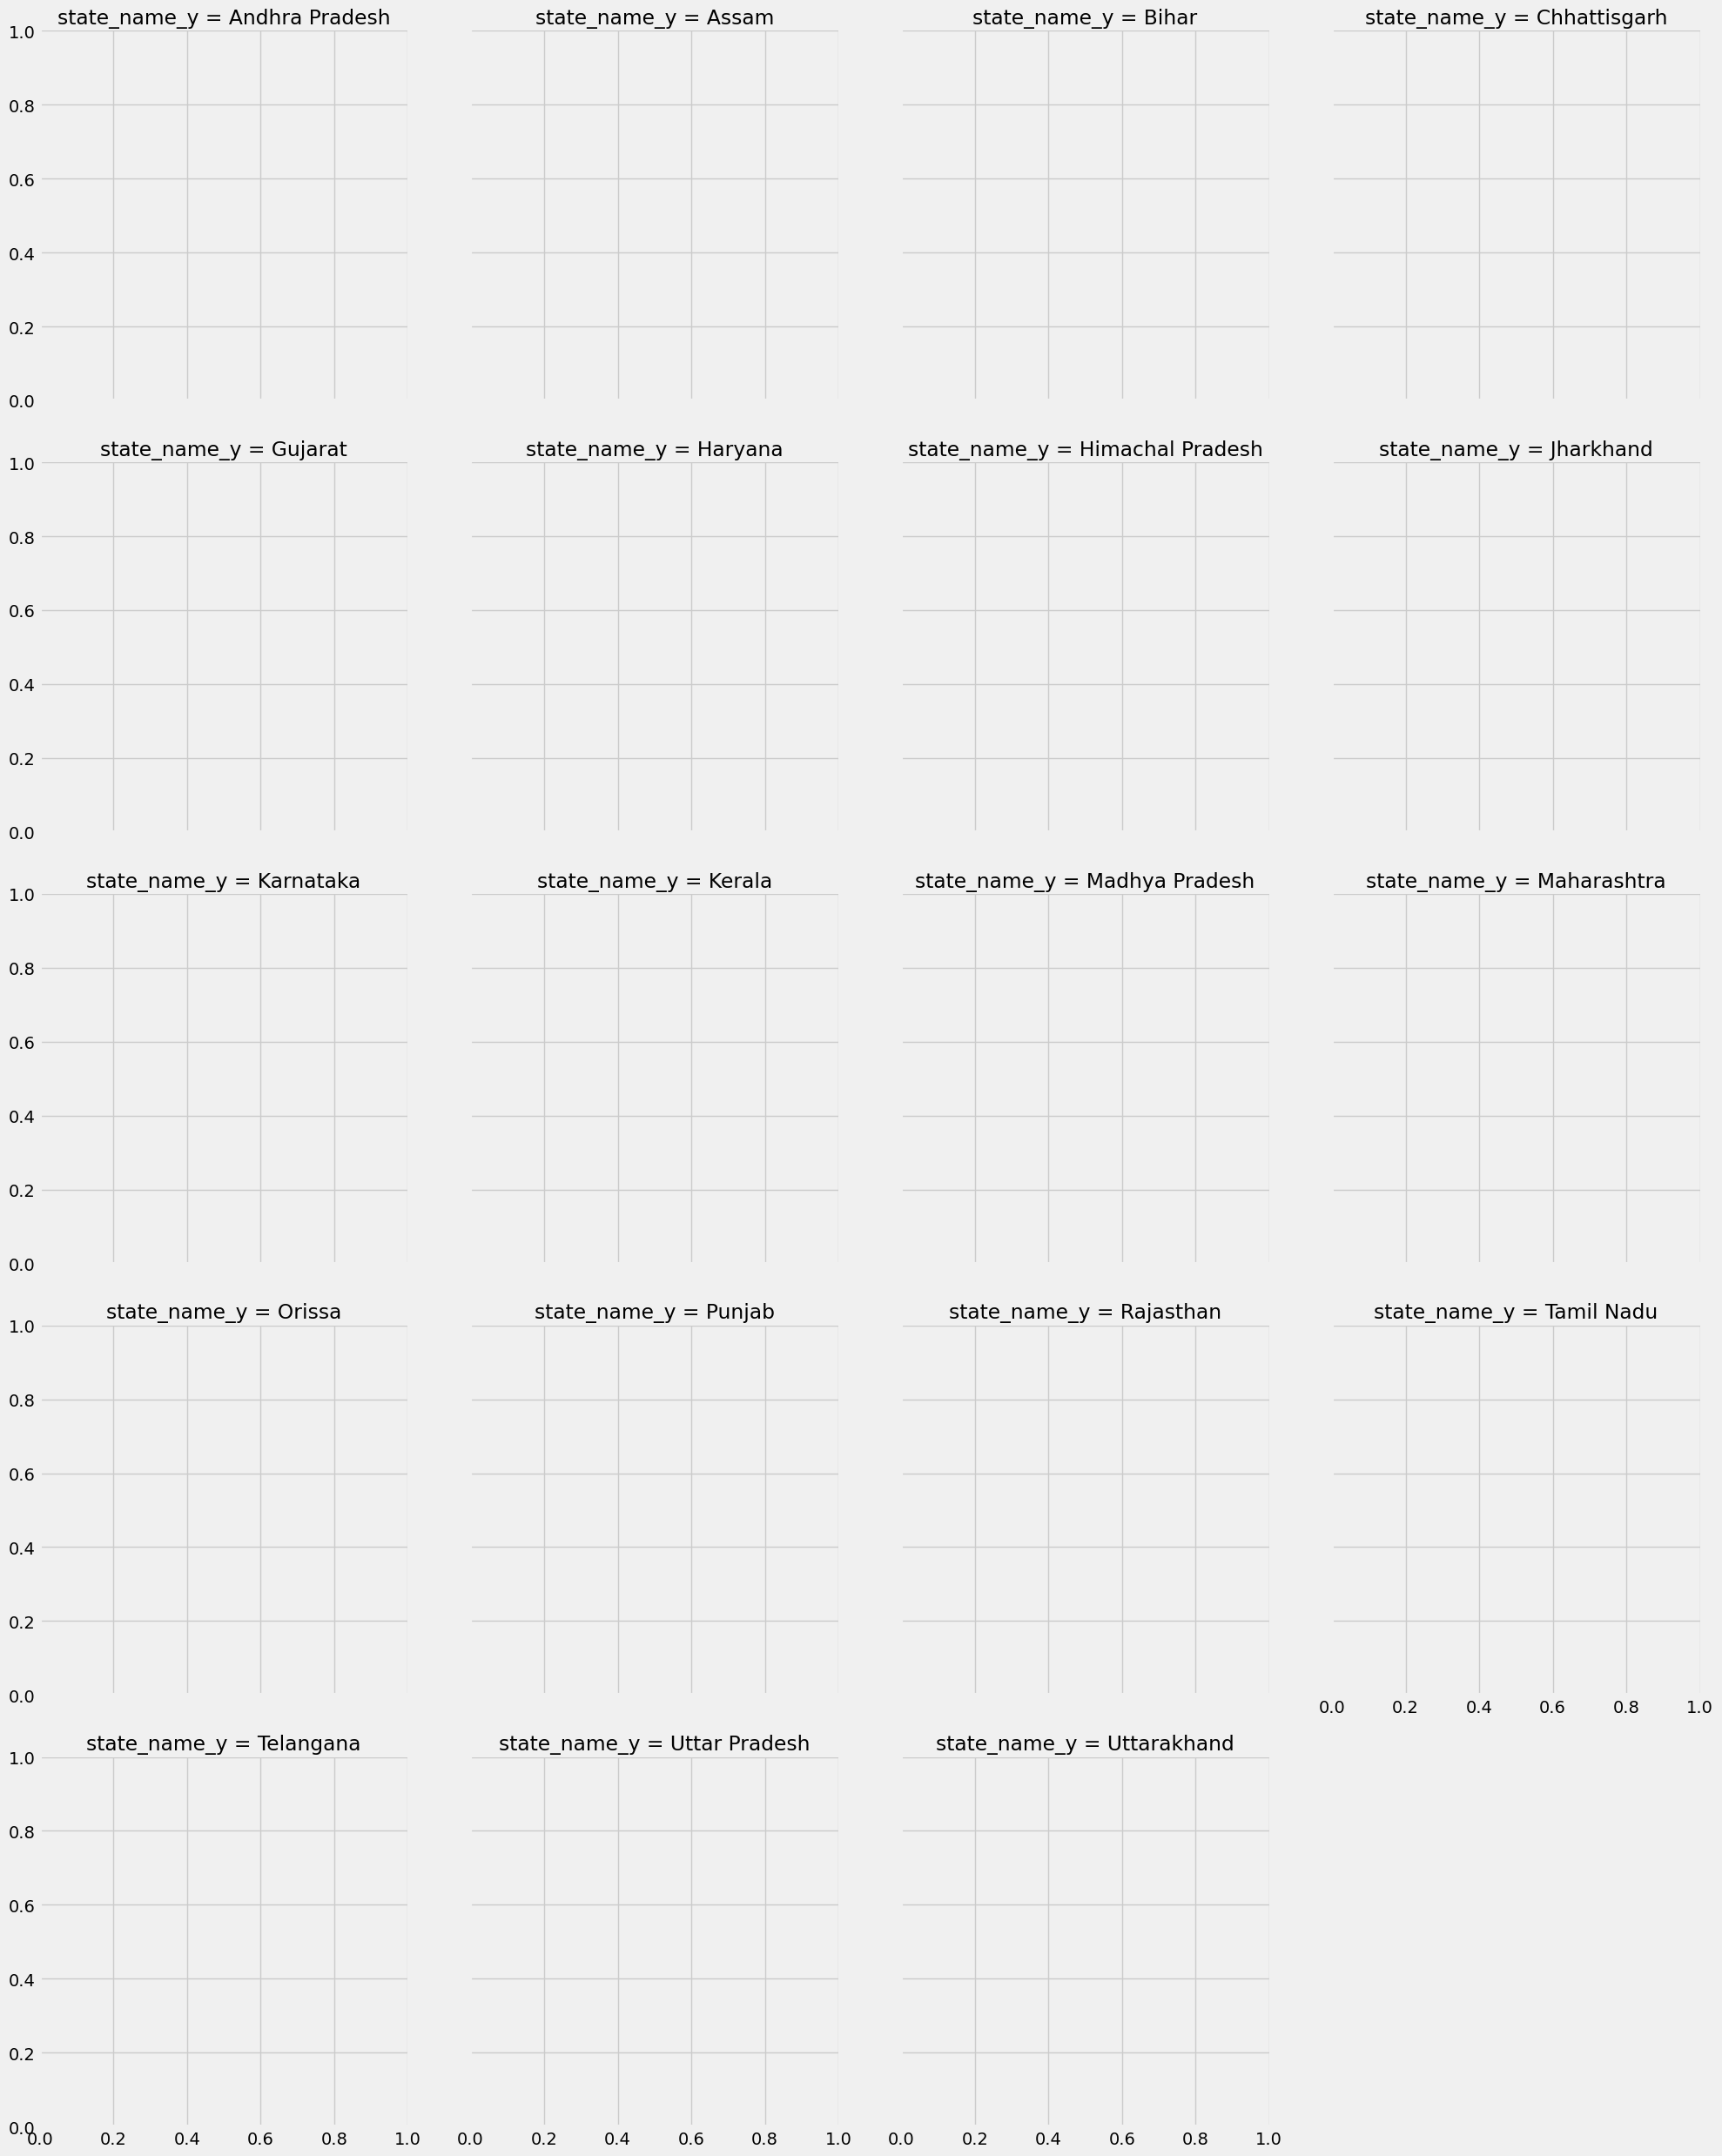

In [92]:
# Step 1: Group by state and crop, calculate total yield for each crop in each state
yield_by_crop_state = df.groupby(['state_name_y', 'crop'])['yield'].sum().reset_index()

# Step 2: Get the top 5 crops based on yield for each state
top_crops_by_state = yield_by_crop_state.groupby('state_name_y').apply(lambda x: x.nlargest(5, 'yield')).reset_index(drop=True)

# Step 3: Create the FacetGrid for plotting
g = sns.FacetGrid(top_crops_by_state, col='state_name_y', col_wrap=4, height=5)

# Step 4: Map the barplot to the grid
g.map(sns.countplot, 'yield', hue='crop')

# Set the plot title and layout
g.set_axis_labels('Crop', 'yield')
g.set_titles(col_template="{col_name}")

# Adjust the layout for better readability
plt.tight_layout()
plt.show()


In [94]:
df.columns

Index(['dist_code', 'year', 'state_code', 'state_name_y', 'dist_name_y',
       'nitrogen_share_in_npk_(percent)', 'phosphate_share_in_npk_(percent)',
       'potash_share_in_npk_(percent)', 'annual_rainfall_(millimeters)',
       'crop', 'yield', 'temp_avg', 'crop_encoded'],
      dtype='object')

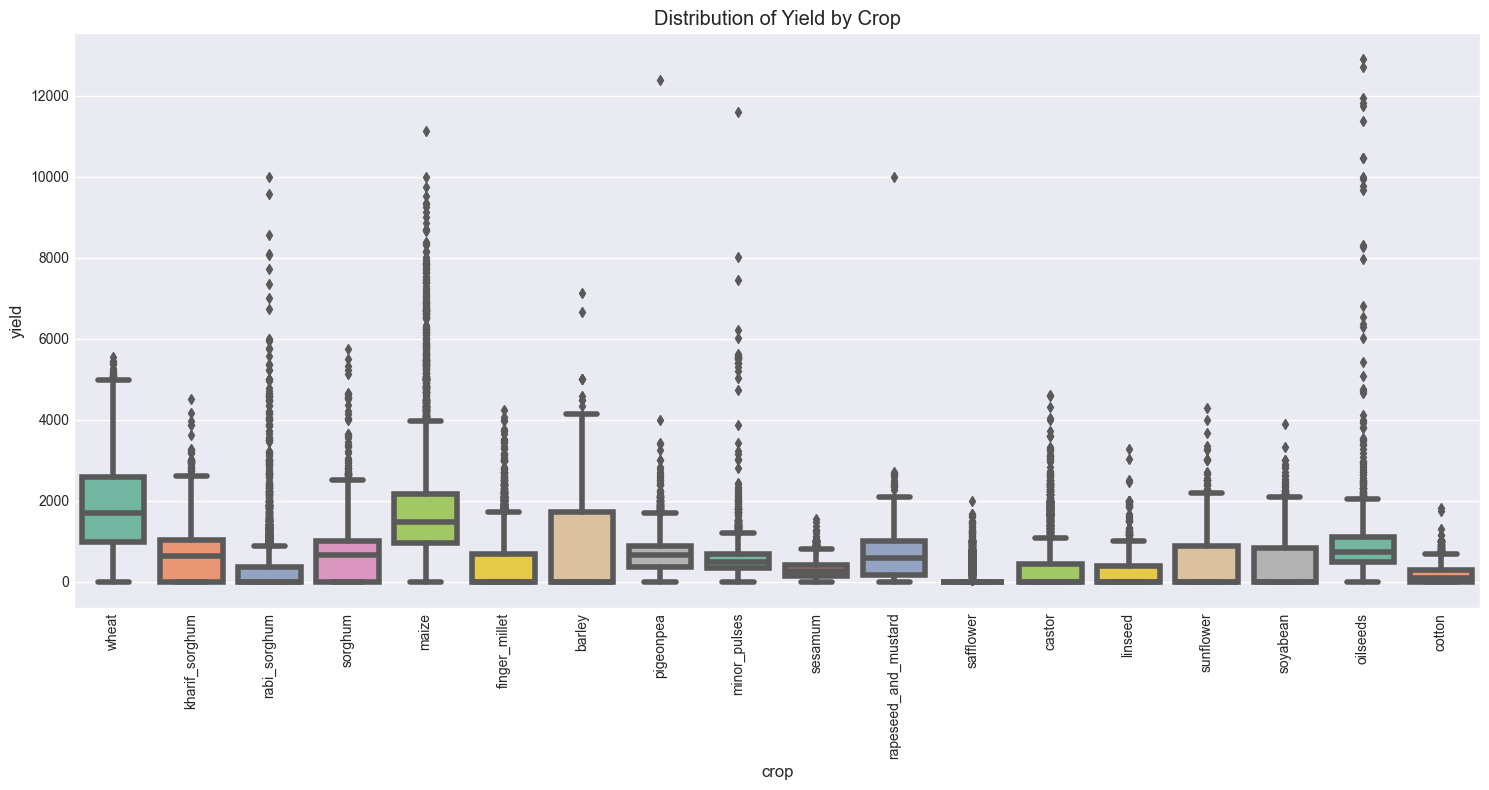

In [135]:
# Plot: Distribution of Yield by Crop
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='crop', y='yield', palette='Set2')
plt.title('Distribution of Yield by Crop')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

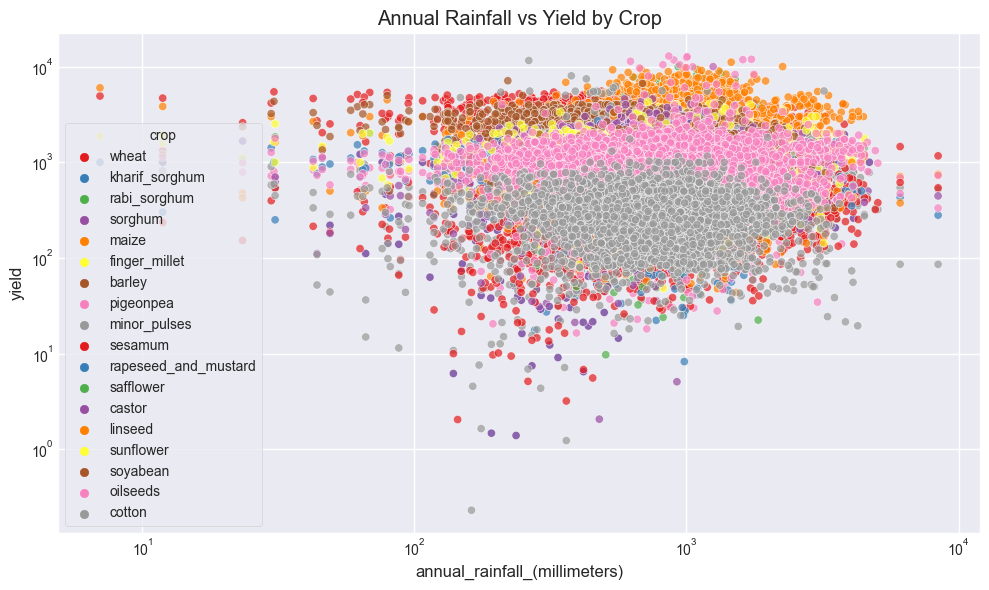

In [136]:
# Plot: Annual Rainfall vs Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='annual_rainfall_(millimeters)', y='yield', hue='crop', palette='Set1', alpha=0.7)
plt.title('Annual Rainfall vs Yield by Crop')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.show()

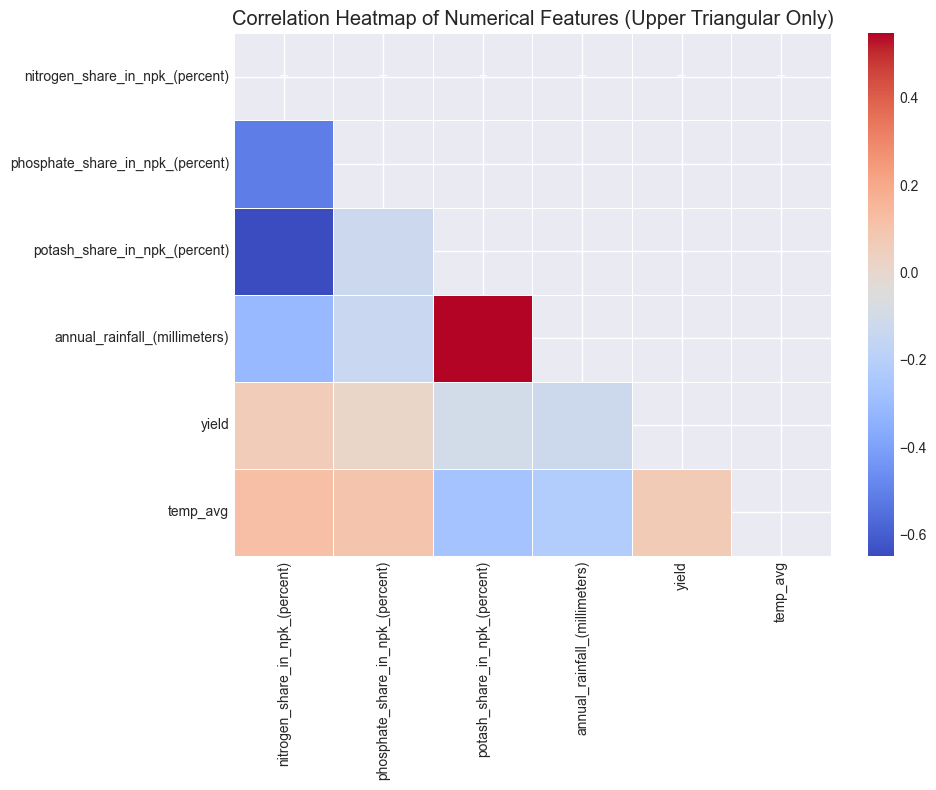

In [137]:
# Compute the correlation matrix
corr = df[['nitrogen_share_in_npk_(percent)', 'phosphate_share_in_npk_(percent)', 
           'potash_share_in_npk_(percent)', 'annual_rainfall_(millimeters)', 
           'yield', 'temp_avg']].corr()

# Create a mask for the upper triangular part
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Numerical Features (Upper Triangular Only)')
plt.tight_layout()
plt.show()

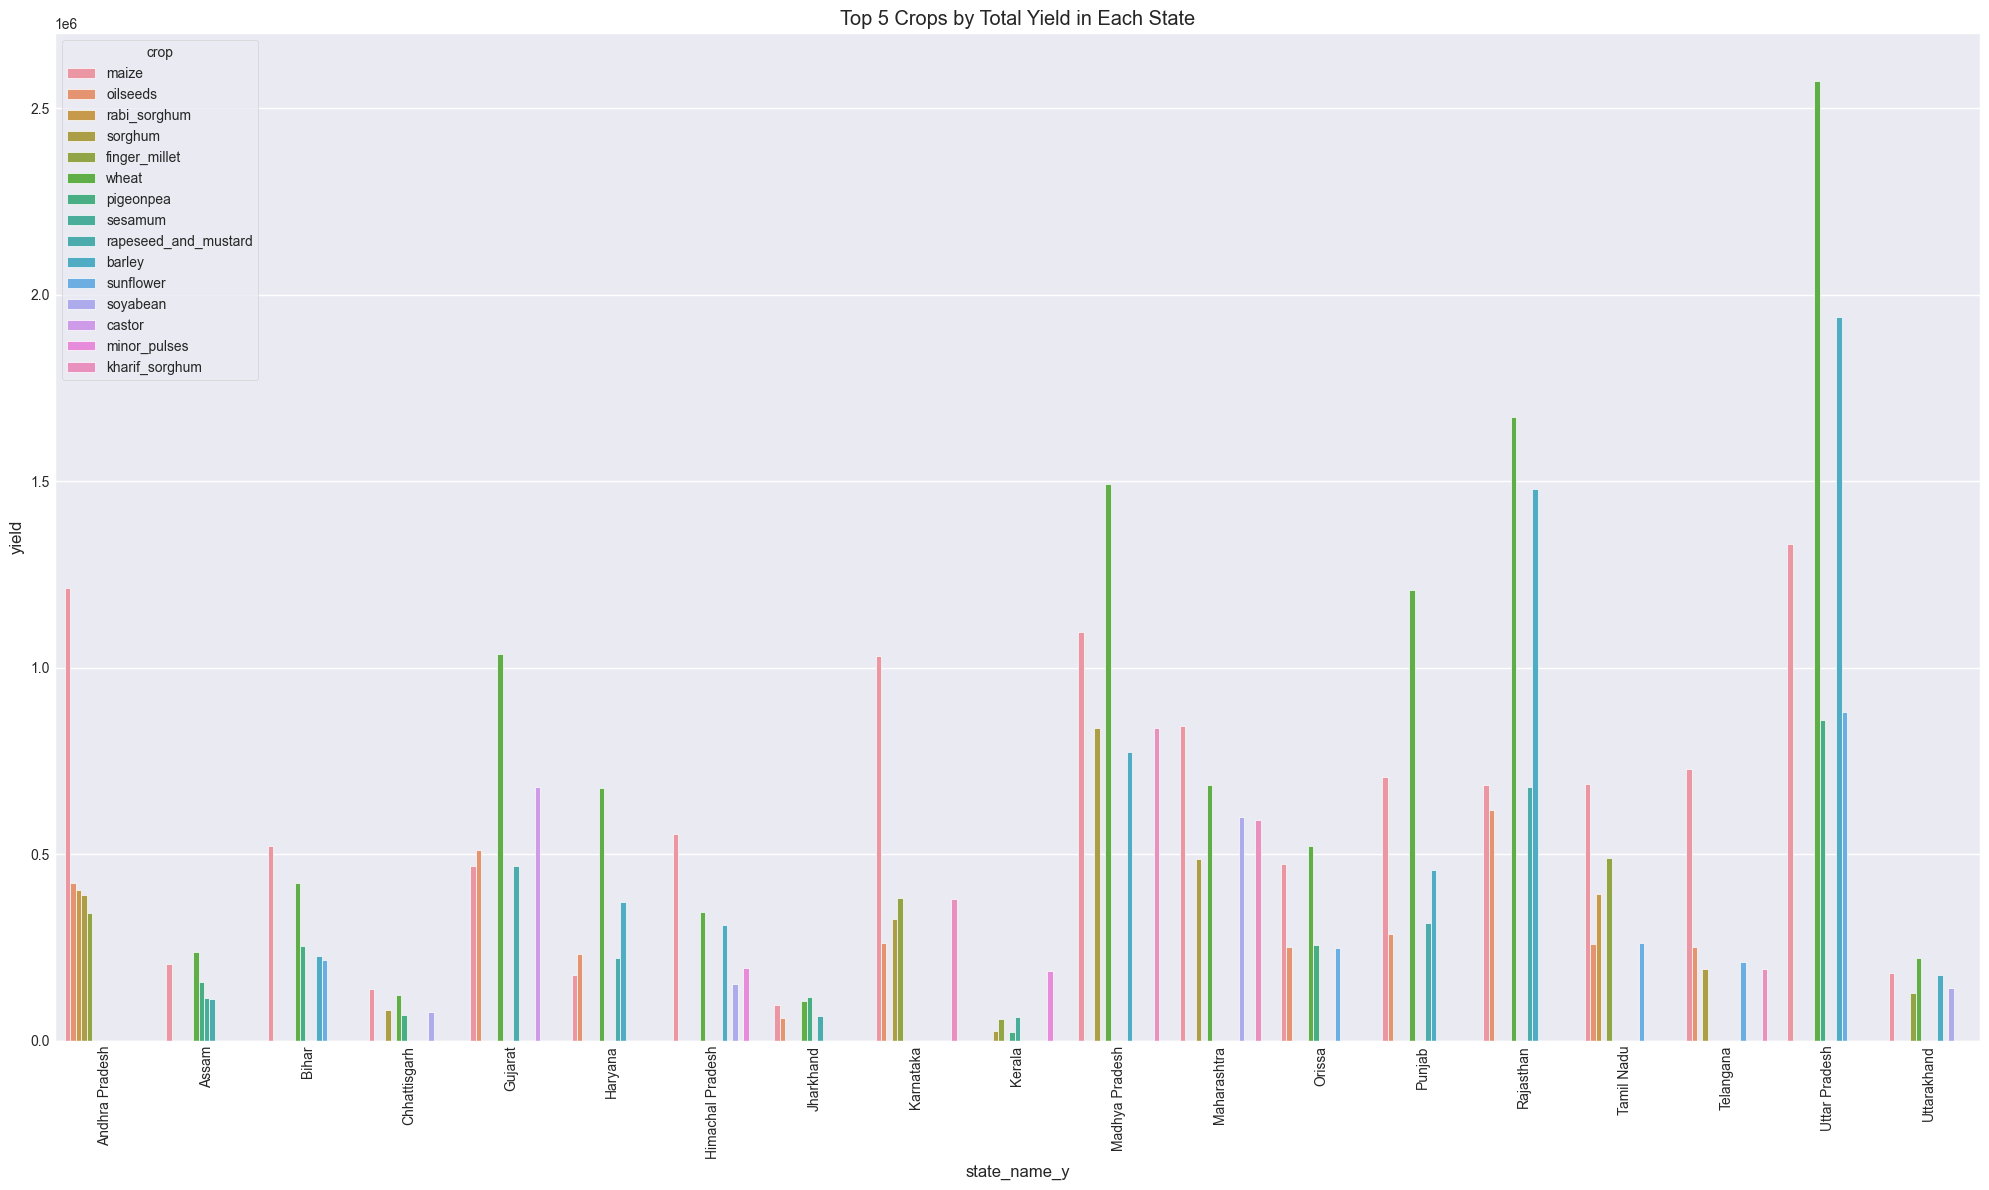

In [138]:
# Group by state and crop, then calculate total yield for each crop in each state
yield_by_crop_state = df.groupby(['state_name_y', 'crop'])['yield'].sum().reset_index()

# Get the top 5 crops based on yield for each state
top_crops_by_state = yield_by_crop_state.groupby('state_name_y').apply(lambda x: x.nlargest(5, 'yield')).reset_index(drop=True)

# Plot: Top 5 Crops by Total Yield per State
plt.figure(figsize=(20, 12))
sns.barplot(data=top_crops_by_state, x='state_name_y', y='yield', hue='crop')
plt.title('Top 5 Crops by Total Yield in Each State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

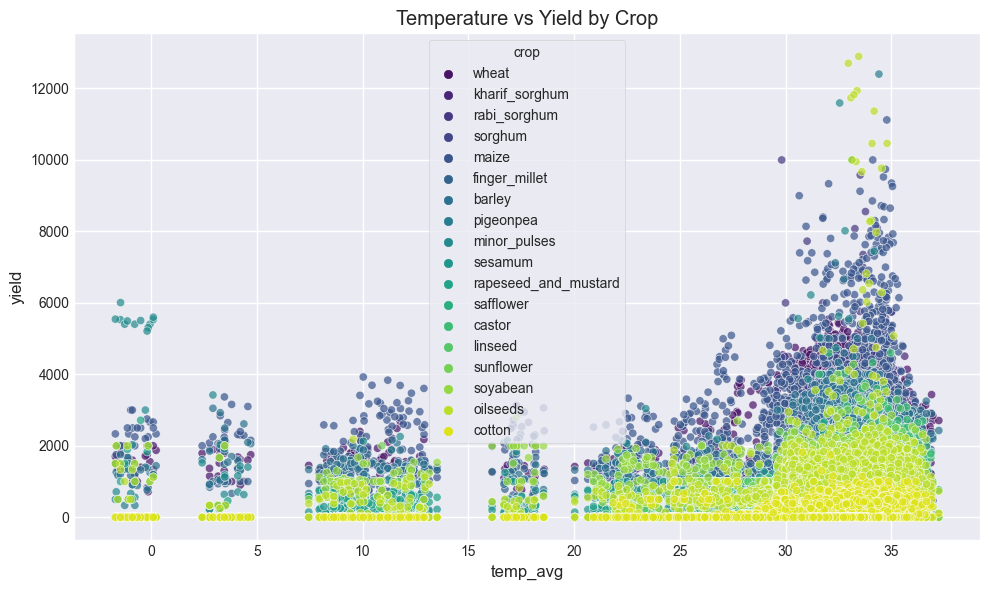

In [140]:
# Plot: Temperature vs Yield by Crop
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp_avg', y='yield', hue='crop', palette='viridis', alpha=0.7)
plt.title('Temperature vs Yield by Crop')
plt.tight_layout()
plt.show()

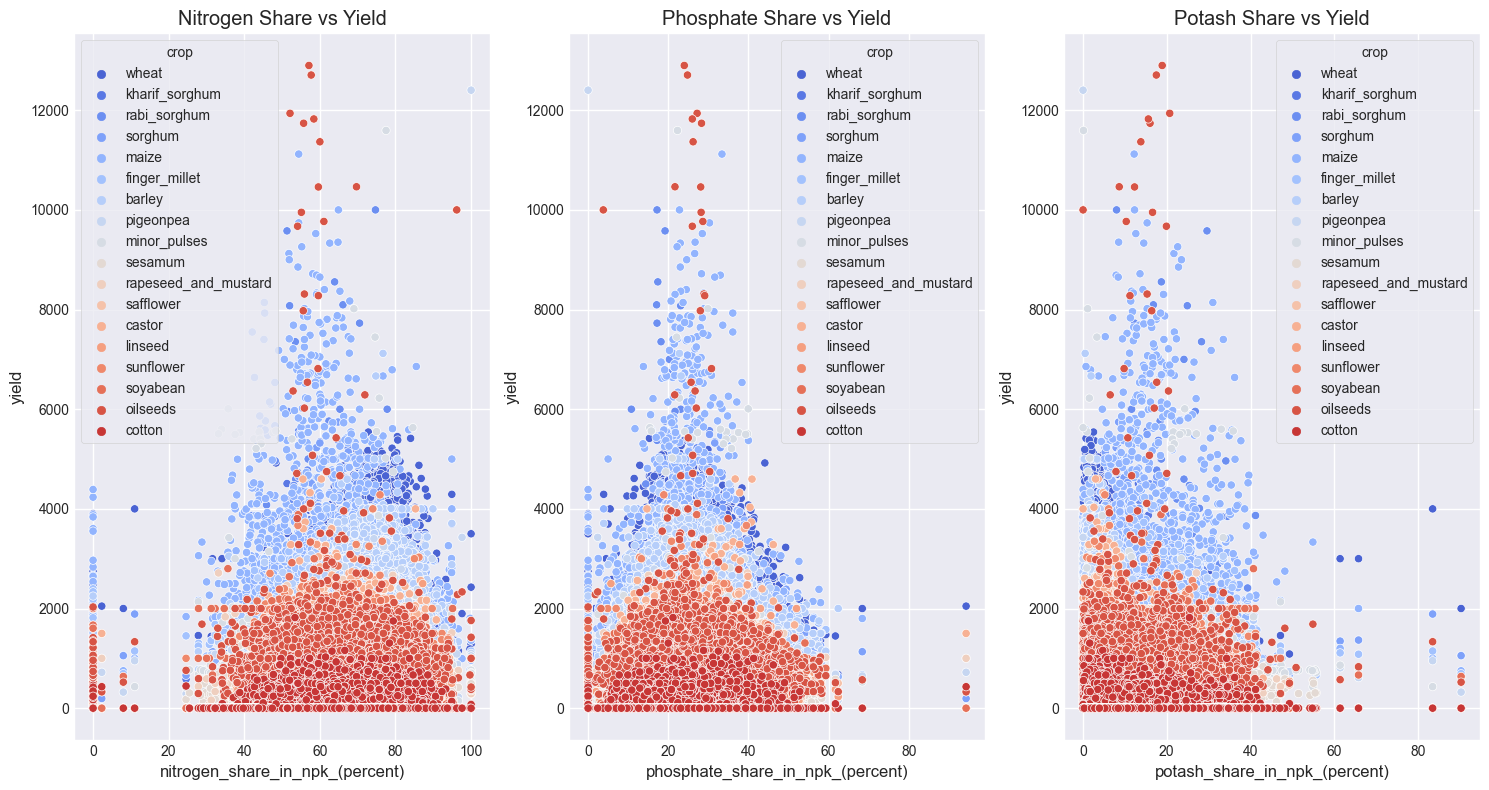

In [141]:
# Plot: Crop Yield vs Nitrogen, Phosphate, and Potash Shares
plt.figure(figsize=(15, 8))

# Nitrogen Share vs Yield
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='nitrogen_share_in_npk_(percent)', y='yield', hue='crop', palette='coolwarm')
plt.title('Nitrogen Share vs Yield')

# Phosphate Share vs Yield
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='phosphate_share_in_npk_(percent)', y='yield', hue='crop', palette='coolwarm')
plt.title('Phosphate Share vs Yield')

# Potash Share vs Yield
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='potash_share_in_npk_(percent)', y='yield', hue='crop', palette='coolwarm')
plt.title('Potash Share vs Yield')

plt.tight_layout()
plt.show()

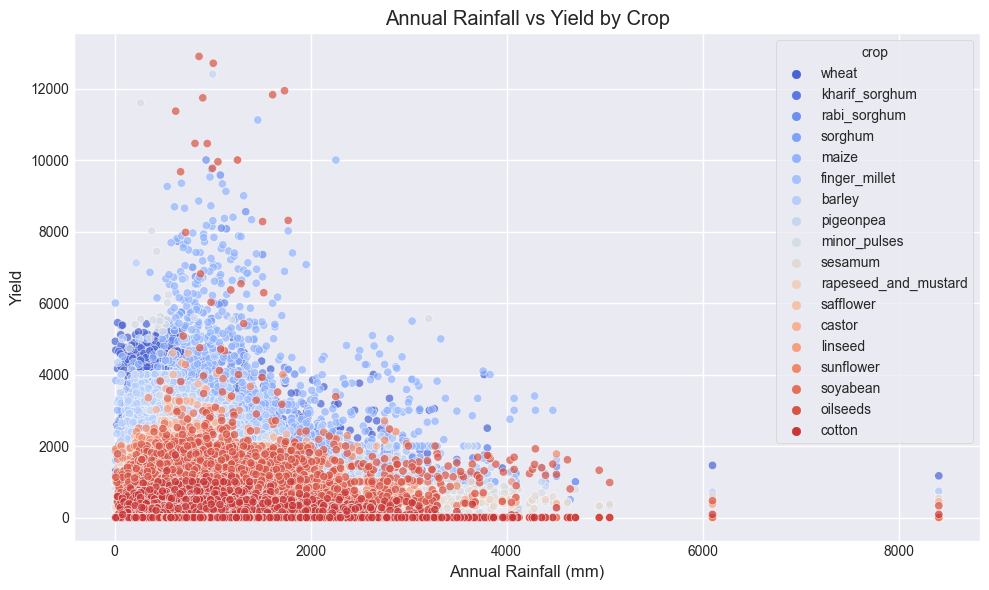

In [142]:
# Plot: Annual Rainfall vs Yield by Crop
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='annual_rainfall_(millimeters)', y='yield', hue='crop', palette='coolwarm', alpha=0.7)
plt.title('Annual Rainfall vs Yield by Crop')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Yield')
plt.tight_layout()
plt.show()